<a href="https://colab.research.google.com/github/goldenfingaz/Machine_Learning_with_Python/blob/main/CIND119_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CLASSIFICATION WITH CUSTOMER CHURN DATASET**

# **Introduction**
Customer churn refers to a situation in business where customers withdraw from a service or cease to carry on a business relationship with a company. Customer churn can be detrimental to a business’s bottom line as it takes away valuable income streams and can have a negative influence on potential customers. In this project, we will address some pertinent questions regarding the issue of customer churn as it relates to one company. Using data collected over a period of time from over 2600 customers, we will attempt to answer the following questions:

1. What factors contribute the most to customer churn?
2. Which groups of customers are more likely to churn?
3. What can the business do to prevent customers from churning?

To answer these questions, we will undertake an analysis of the dataset using a wide range of tools including Python, R and Tableau. We will begin by preprocessing the data to ensure it is clean and consistent. This will be followed by an exploratory data analysis to find relationships among the different variables and how they can help us further understand the issue of customer churn. Finally, we will undertake the task of building machine learning models using two classification algorithms, Naive Bayes and Decision Trees. The goal of these models is to help the company identify customer churn before it occurs in order to take the necessary steps to prevent it from happening.

# Data Preparation
The dataset
The dataset to be utilized comprises 2699 records with 17 different attributes, The target attribute is “churn’, a binary class that determines whether the customer in question churned or not. A total of 2307 customers are classified as “no” while the remaining 392 are classified as “yes”. This means the dataset is imbalanced by a ratio of approximately 1 : 6. 



# Predictive Modeling (Classification)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
churnclean2 = pd.read_csv("https://raw.githubusercontent.com/siglimumuni/Datasets/master/churnclean2.csv")

In [5]:
churnclean2.head()

state  acclength  areacode  ... intlcharge custservcalls  churn
0    KS        128       415  ...       2.70             1     no
1    OH        107       415  ...       3.70             1     no
2    NJ        137       415  ...       3.29             0     no
3    OK         75       415  ...       2.73             3     no
4    AL        118       510  ...       1.70             0     no

[5 rows x 16 columns]

In [6]:
churnclean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2786 entries, 0 to 2785
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          2786 non-null   object 
 1   acclength      2786 non-null   int64  
 2   areacode       2786 non-null   int64  
 3   interplan      2786 non-null   object 
 4   vmailplan      2786 non-null   object 
 5   vmailmess      2786 non-null   int64  
 6   daycalls       2786 non-null   int64  
 7   daycharge      2786 non-null   float64
 8   evecalls       2786 non-null   int64  
 9   evecharge      2786 non-null   float64
 10  nightcalls     2786 non-null   int64  
 11  nightcharge    2786 non-null   float64
 12  intlcalls      2786 non-null   int64  
 13  intlcharge     2786 non-null   float64
 14  custservcalls  2786 non-null   int64  
 15  churn          2786 non-null   object 
dtypes: float64(4), int64(8), object(4)
memory usage: 348.4+ KB


## **Data Preprocessing**



The dataset contains three object type variables. I built a custom function using sklearn's preprocessing tool to encode all three variables to numerical labels.

In [7]:
from sklearn import preprocessing
def convert(data):
    number = preprocessing.LabelEncoder()
    data['interplan'] = number.fit_transform(data.interplan)
    data['vmailplan'] = number.fit_transform(data.vmailplan)
    data['state'] = number.fit_transform(data.state)
    data=data.fillna(-999)
    return data.head()

In [8]:
convert(churnclean2)

state  acclength  areacode  ...  intlcharge  custservcalls  churn
0     16        128       415  ...        2.70              1     no
1     35        107       415  ...        3.70              1     no
2     31        137       415  ...        3.29              0     no
3     36         75       415  ...        2.73              3     no
4      1        118       510  ...        1.70              0     no

[5 rows x 16 columns]

In [9]:
print(churnclean2["churn"].value_counts())

no     2484
yes     302
Name: churn, dtype: int64


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = churnclean2.drop("churn",axis=1)
y = churnclean2["churn"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

# **Classification with imbalanced dataset**

## **Decision Tree**

The Decision Tree algorithm is based on a tree structure and is used to build classification or regression models. It works by breading down a dataset into smaller sets while developing an associated decision tree. Once completed, a decision tree will consist of decision nodes and leaf nodes. The decision node branches out into two or more branches and the leaf nodes at the end of it represents a classification decision. At the very top of the tree is the root node, which unsurprisingly represents the most important or best predictor.

For this project, I will implement the decision tree algorithm using Python's sklearn library.

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
treepredictions = dtree.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
print("Decision Tree with imbalanced dataset")
cm = confusion_matrix(y_test, treepredictions)
print(cm)
print('\n')
print(classification_report(y_test,treepredictions))
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Decision Tree with imbalanced dataset
[[720  29]
 [ 32  55]]


              precision    recall  f1-score   support

          no       0.96      0.96      0.96       749
         yes       0.65      0.63      0.64        87

    accuracy                           0.93       836
   macro avg       0.81      0.80      0.80       836
weighted avg       0.93      0.93      0.93       836

TP:  55 , FP:  29 , TN:  720 , FN: 32


## **Naive Bayes**

Naive Bayes consists of a group of supervised learning algorithms that implement Bayes Theorem with what is referred to as a “naive” assumption of the conditional independence between every pair of features while taking the  target variable into consideration. While the assumptions behind Naive Bayes are deemed to be oversimplified, it has worked well in real world situations especially for filtering documents and identifying email spam. One huge advantage of Naive Bayes is the fact that it requires relatively small amounts of data to train. In this project, I implement the Gaussian Naive Bayes Algorithm for classification.

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
nbayes = GaussianNB()

In [19]:
nbayes.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
nbayespredictions = nbayes.predict(X_test)

In [21]:
print("Naive Bayes with Imbalanced dataset")
cm = confusion_matrix(y_test, nbayespredictions)
print(cm)
print('\n')
print(classification_report(y_test,nbayespredictions))
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Naive Bayes with Imbalanced dataset
[[704  45]
 [ 54  33]]


              precision    recall  f1-score   support

          no       0.93      0.94      0.93       749
         yes       0.42      0.38      0.40        87

    accuracy                           0.88       836
   macro avg       0.68      0.66      0.67       836
weighted avg       0.88      0.88      0.88       836

TP:  33 , FP:  45 , TN:  704 , FN: 54


# **Random Forests**

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
randF = RandomForestClassifier(n_estimators = 200)

In [24]:
randF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
randFPredictions = randF.predict(X_test)

In [26]:
print("Random Forests with imbalanced dataset")
cm = confusion_matrix(y_test, randFPredictions)
print(cm)
print('\n')
print(classification_report(y_test,randFPredictions))
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Random Forests with imbalanced dataset
[[746   3]
 [ 37  50]]


              precision    recall  f1-score   support

          no       0.95      1.00      0.97       749
         yes       0.94      0.57      0.71        87

    accuracy                           0.95       836
   macro avg       0.95      0.79      0.84       836
weighted avg       0.95      0.95      0.95       836

TP:  50 , FP:  3 , TN:  746 , FN: 37


## **Classification with Balanced Dataset**

As indicated earlier, the original dataset is imbalanced by by a ratio of 1:6, with the majority class being the "yes" class. Working with imbalanced datasets can be problematic if there are too few examples of the minority class to incorporate into the decision boundary. Subsequently, the model becomes extremely good at predicting the majority class, but does not do so well with the minority class. We hope to improve out models' performance by balancing the dataset so it has equal numbers of both classes.


Several techniques exist for balancing datasets, however for the purpose of this project and largely because of the nature of the imbalance, we will be implementing the oversampling technique. As the name suggests, this is achieved by oversampling the minority class in the training dataset. Examples are drawn from the minority class and duplicated to match their occurrence with the majority class. This only serves to balance the dataset without amending or including any additional information.

While many approaches exist for this, the most widely used is probably the Synthetic Minority Oversampling TEchnique, commonly referred to as SMOTE.SMOTE works by first selecting a minority class instance. It then finds the k nearest neighbor of the minority class and creates a synthetic instance by connecting the first instance with one of the k nearest neighbors to form a line segment. A synthetic example is then generated at random point between the two examples within the feature space.

For this project, I will use the Imbalanced Lean Python library to implement SMOTE for the purpose of balancing the dataset.


In [27]:
!pip install SMOTE

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
oversample = SMOTE()

In [36]:
X,y = oversample.fit_resample(X,y)

In [37]:
from collections import Counter

In [38]:
print(Counter(y))

Counter({'no': 2484, 'yes': 2484})


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

## **Decision Tree (Balanced)**

In [40]:
dtree_balanced = DecisionTreeClassifier()
dtree_balanced.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
treepredictions_balanced = dtree_balanced.predict(X_test)

In [42]:
print("Decision Tree with Balanced Dataset")
cm = confusion_matrix(y_test, treepredictions_balanced)
print(cm)
print('\n')
print(classification_report(y_test,treepredictions_balanced))
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Decision Tree with Balanced Dataset
[[656  87]
 [ 58 690]]


              precision    recall  f1-score   support

          no       0.92      0.88      0.90       743
         yes       0.89      0.92      0.90       748

    accuracy                           0.90      1491
   macro avg       0.90      0.90      0.90      1491
weighted avg       0.90      0.90      0.90      1491

TP:  690 , FP:  87 , TN:  656 , FN: 58


In [43]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
features = list(churnclean2.columns[0:15])
features

['state',
 'acclength',
 'areacode',
 'interplan',
 'vmailplan',
 'vmailmess',
 'daycalls',
 'daycharge',
 'evecalls',
 'evecharge',
 'nightcalls',
 'nightcharge',
 'intlcalls',
 'intlcharge',
 'custservcalls']

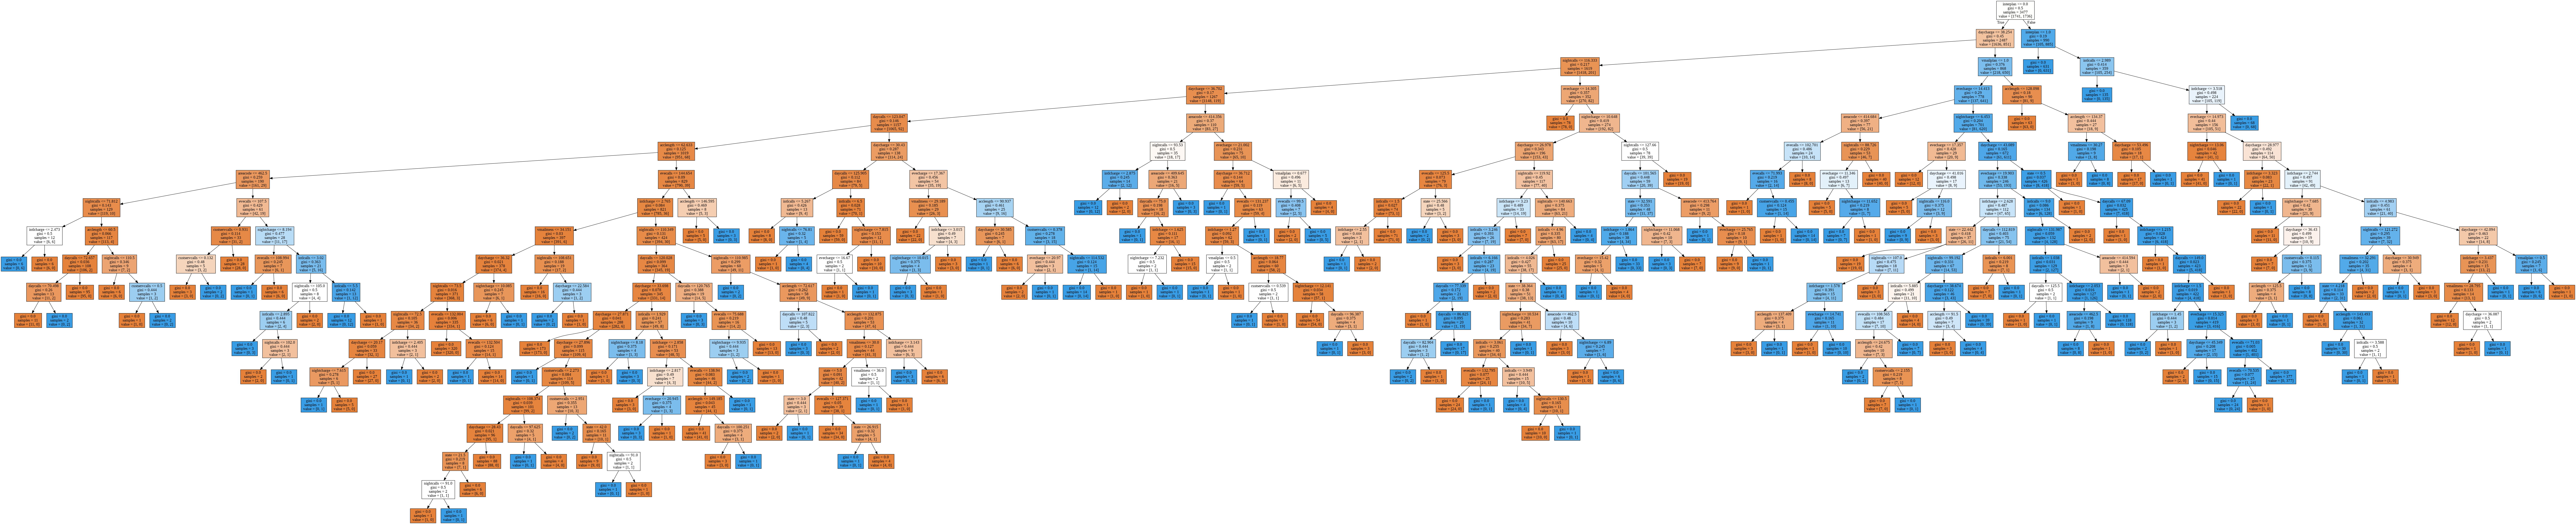

In [44]:
dot_data = StringIO()
export_graphviz(dtree_balanced, out_file=dot_data,feature_names=features,filled=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

## **Naive Bayes (Balanced)**

In [45]:
nbayes_balanced = GaussianNB()

In [46]:
nbayes_balanced.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [47]:
nbayespredictions_balanced = nbayes_balanced.predict(X_test)

In [48]:
print("Naive Bayes with Balanced Dataset")
cm = confusion_matrix(y_test, nbayespredictions_balanced)
print(cm)
print('\n')
print(classification_report(y_test,nbayespredictions_balanced))
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Naive Bayes with Balanced Dataset
[[550 193]
 [107 641]]


              precision    recall  f1-score   support

          no       0.84      0.74      0.79       743
         yes       0.77      0.86      0.81       748

    accuracy                           0.80      1491
   macro avg       0.80      0.80      0.80      1491
weighted avg       0.80      0.80      0.80      1491

TP:  641 , FP:  193 , TN:  550 , FN: 107


# **Random Forests**

In [49]:
randF_balanced = RandomForestClassifier(n_estimators = 200)

In [50]:
randF_balanced.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
randFPredictions_balanced = randF_balanced.predict(X_test)

In [52]:
print("Random Forests with Balanced Dataset")
cm = confusion_matrix(y_test, randFPredictions_balanced)
print(cm)
print('\n')
print(classification_report(y_test,randFPredictions_balanced))
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Random Forests with Balanced Dataset
[[706  37]
 [ 45 703]]


              precision    recall  f1-score   support

          no       0.94      0.95      0.95       743
         yes       0.95      0.94      0.94       748

    accuracy                           0.95      1491
   macro avg       0.95      0.95      0.95      1491
weighted avg       0.95      0.95      0.95      1491

TP:  703 , FP:  37 , TN:  706 , FN: 45


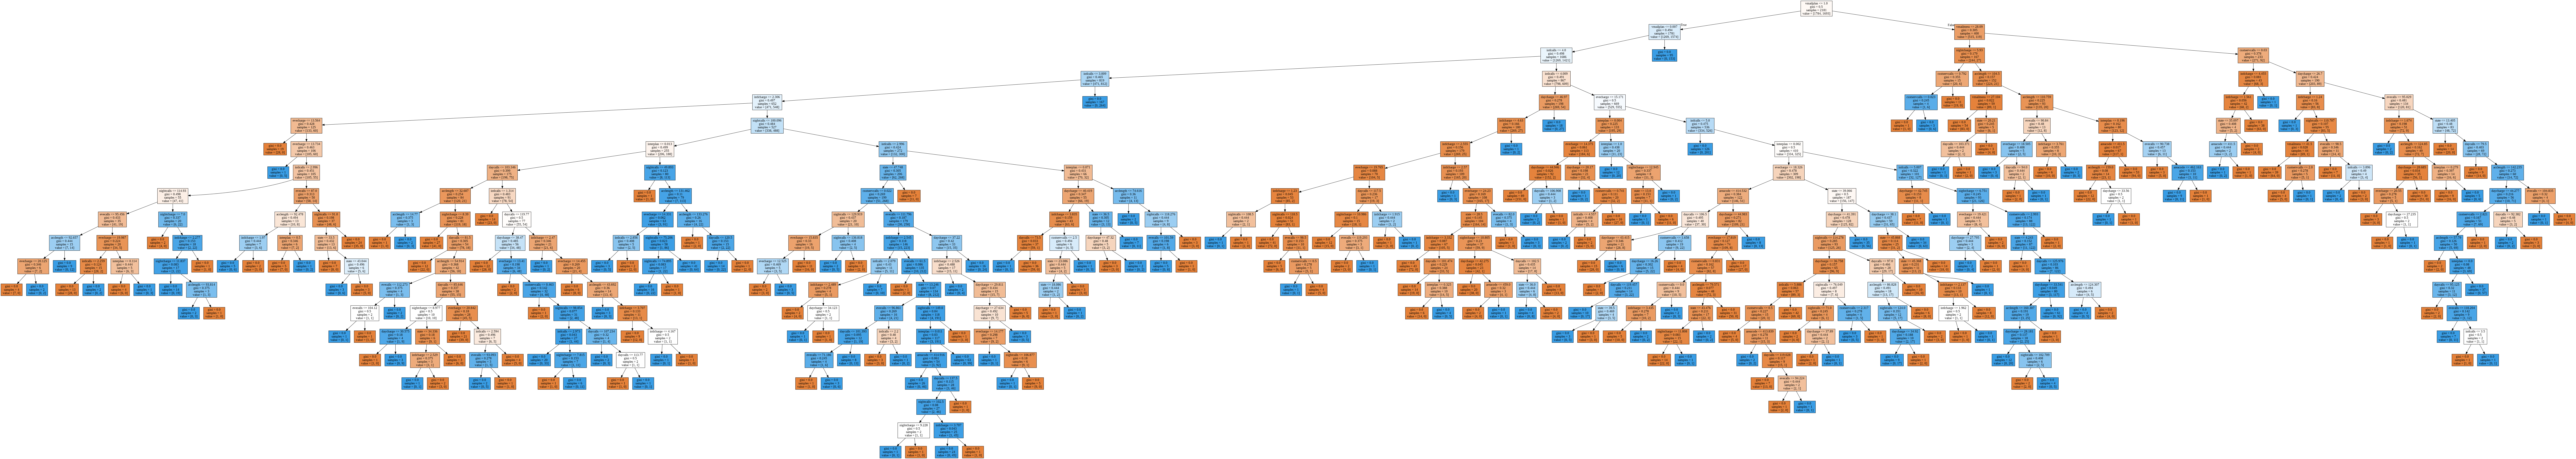

In [53]:
dot_data = StringIO()
export_graphviz(randF_balanced.estimators_[0], out_file=dot_data,feature_names=features,filled=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [54]:
randF_balanced.feature_importances_

array([0.03524735, 0.03422554, 0.0372475 , 0.20725842, 0.04215233,
       0.02786009, 0.03800902, 0.23846693, 0.03119596, 0.07711948,
       0.03508293, 0.04226483, 0.05992282, 0.03953899, 0.05440781])

In [55]:
feature_importances = pd.DataFrame(randF_balanced.feature_importances_,
                                   index = churnclean2.columns[0:15],
                                    columns=['Importance']).sort_values('Importance',ascending=False)
                                

In [56]:
print(feature_importances)

               Importance
daycharge        0.238467
interplan        0.207258
evecharge        0.077119
intlcalls        0.059923
custservcalls    0.054408
nightcharge      0.042265
vmailplan        0.042152
intlcharge       0.039539
daycalls         0.038009
areacode         0.037248
state            0.035247
nightcalls       0.035083
acclength        0.034226
evecalls         0.031196
vmailmess        0.027860


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Feature Importance for Random Forest Model on Balanced Dataset')

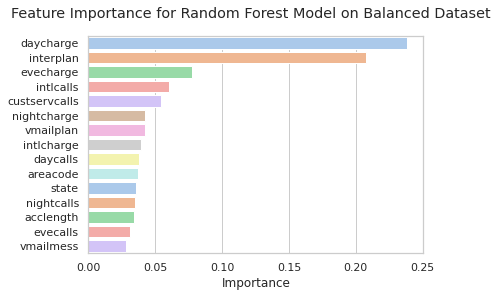

In [57]:
sns.set_theme(style="whitegrid")
sns.barplot(feature_importances['Importance'],feature_importances.index,palette="pastel")
plt.suptitle("Feature Importance for Random Forest Model on Balanced Dataset")

In [58]:
feature_importances.index

Index(['daycharge', 'interplan', 'evecharge', 'intlcalls', 'custservcalls',
       'nightcharge', 'vmailplan', 'intlcharge', 'daycalls', 'areacode',
       'state', 'nightcalls', 'acclength', 'evecalls', 'vmailmess'],
      dtype='object')

# **References**

H. Zhang (2004). The optimality of Naive Bayes. Proc. FLAIRS.

H. He & Y. Ma (2013). Imbalanced Learning: Foundations, Algorithms, and Applications 1st Edition

saedsayad.com (2021). Decision Tree - Classification. (Last accessed at https://www.saedsayad.com/decision_tree.htm on 10/05/2021)